## **Recurrent Neural N. (RNN) Tutorial for Beginners**
[캐글 필사코드 이동하기](https://www.kaggle.com/code/rafetcan/recurrent-neural-n-rnn-tutorial-for-beginners)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
print("Data Shape -->", data.shape)

Data Shape --> (2416, 7)


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [ ]:
print("Training Size: ", training_size)
print("total length of data: ", data_len)
print("Train length: ", len(train))
print("Test length: ", len(test))

Training Size:  1932
total length of data:  2416
Train length:  1932
Test length:  484


In [ ]:
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [ ]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (1892, 40, 1)
y_train shape:  (1892,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
95/95 [==============================] - 5s 53ms/step - loss: 0.0013
Epoch 2/100
95/95 [==============================] - 8s 89ms/step - loss: 0.0013
Epoch 3/100
95/95 [==============================] - 9s 98ms/step - loss: 0.0015
Epoch 4/100
95/95 [==============================] - 9s 99ms/step - loss: 0.0013
Epoch 5/100
95/95 [==============================] - 6s 62ms/step - loss: 0.0013
Epoch 6/100
95/95 [==============================] - 5s 53ms/step - loss: 0.0013
Epoch 7/100
95/95 [==============================] - 4s 39ms/step - loss: 0.0014
Epoch 8/100
95/95 [==============================] - 4s 40ms/step - loss: 0.0013
Epoch 9/100
95/95 [==============================] - 5s 52ms/step - loss: 0.0013
Epoch 10/100
95/95 [==============================] - 4s 39ms/step - loss: 0.0014
Epoch 11/100
95/95 [==============================] - 4s 39ms/step - loss: 0.0014
Epoch 12/100
95/95 [==============================] - 4s 47ms/step - loss: 0.0015
Epoch 13/100
95/95 [=====

In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1932,2018-03-02,326.980011,335.220001,322.970001,335.119995,335.119995,5092800
1933,2018-03-05,332.390015,337.750000,329.290009,333.350006,333.350006,3823800
1934,2018-03-06,333.750000,336.369995,327.029999,328.200012,328.200012,4285700
1935,2018-03-07,325.440002,332.500000,321.739990,332.299988,332.299988,5007300
1936,2018-03-08,332.859985,333.299988,326.269989,329.100006,329.100006,3566200


In [ ]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape: ", real_price.shape)

Real Price Shape:  (484, 1)


In [ ]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape: ", X_test.shape)

X_test shape:  (372, 40)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

12/12 [==============================] - 1s 13ms/step


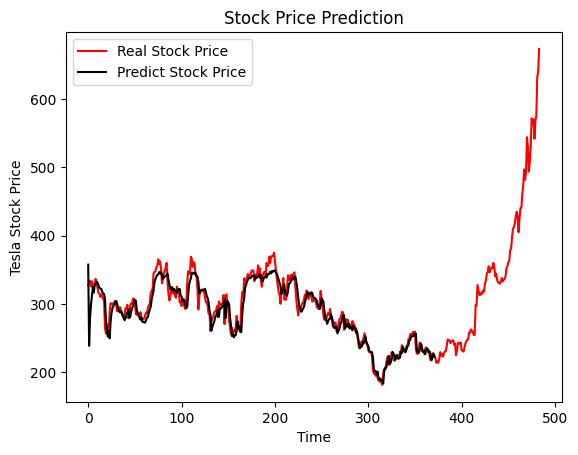

In [ ]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()